<a href="https://colab.research.google.com/github/VaibhavBhusawale/Time-series-EDA/blob/main/Airline_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import date
import statsmodels.api as sms



from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importing data

from google.colab import drive
drive.mount ('/content/drive')


Mounted at /content/drive


In [ ]:
# Read the health insurance data set 
path = '/content/drive/MyDrive/airline_passengers.csv'

df_airline = pd.read_csv(path)

In [ ]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [ ]:
df_airline.dropna(axis=0,inplace=True)

In [ ]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [ ]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [ ]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [ ]:
df_airline.set_index('Month',inplace=True)

In [ ]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


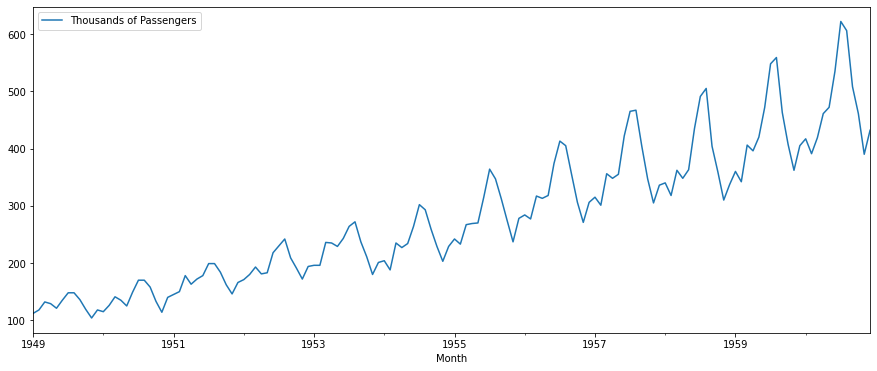

In [ ]:
df_airline.plot(figsize=(15,6))

#Dickey Fullar test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
  result=adfuller(series)
  print('ADF statistics : {}'.format(result[0]))
  print('P-values : {}'.format(result[1]))
  if result[1]<0.05:
    print('strong evidence against the null hypothesis, Reject the Null Hypothesis. Data has no unit root and is stationary')
  else:
    print('weak evidence against null hypothesis, Time series has a unit root, Indicating it is non stationary')


In [ ]:
adf_test(df_airline['Thousands of Passengers'])

ADF statistics : 0.8153688792060472
P-values : 0.991880243437641
weak evidence against null hypothesis, Time series has a unit root, Indicating it is non stationary


In [ ]:
df_airline['Passenger_first_diff']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [ ]:
df_airline.head()

,Thousands of Passengers,Passenger_first_diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [ ]:
adf_test(df_airline['Passenger_first_diff'].dropna())

ADF statistics : -2.8292668241700056
P-values : 0.054213290283824704
weak evidence against null hypothesis, Time series has a unit root, Indicating it is non stationary


In [ ]:
df_airline['Passenger_second_diff']=df_airline['Passenger_first_diff']-df_airline['Passenger_first_diff'].shift(1)

In [ ]:
df_airline.head()

,Thousands of Passengers,Passenger_first_diff,Passenger_second_diff
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [ ]:
adf_test(df_airline['Passenger_second_diff'].dropna())

ADF statistics : -16.384231542468495
P-values : 2.7328918500143186e-29
strong evidence against the null hypothesis, Reject the Null Hypothesis. Data has no unit root and is stationary


In [ ]:
# 12 month diff
df_airline['Passenger_12_diff']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [ ]:
df_airline.head()

,Thousands of Passengers,Passenger_first_diff,Passenger_second_diff,Passenger_12_diff
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [ ]:
adf_test(df_airline['Passenger_12_diff'].dropna())

ADF statistics : -3.383020726492481
P-values : 0.011551493085514952
strong evidence against the null hypothesis, Reject the Null Hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

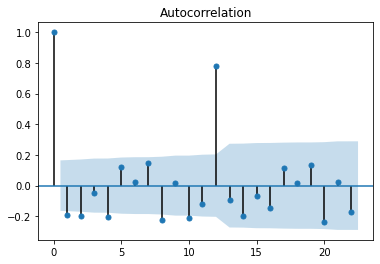

In [ ]:
acf=plot_acf(df_airline['Passenger_second_diff'].dropna())

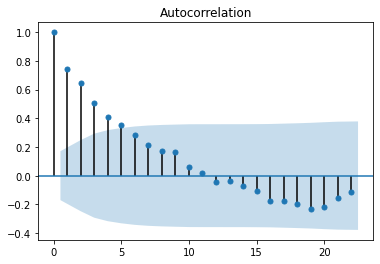

In [ ]:
acf12=plot_acf(df_airline['Passenger_12_diff'].dropna())

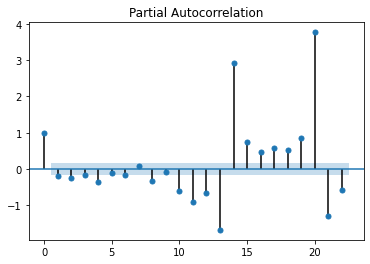

In [ ]:
result =plot_pacf(df_airline['Passenger_second_diff'].dropna())

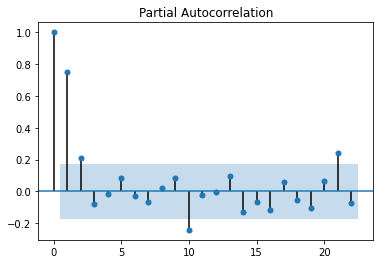

In [ ]:
acf12=plot_pacf(df_airline['Passenger_12_diff'].dropna())

In [ ]:
df_airline

,Thousands of Passengers,Passenger_first_diff,Passenger_second_diff,Passenger_12_diff
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [ ]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1950,12,1)
test_dataset_end=datetime(1960,12,1)


In [ ]:
train_data = df_airline[:train_dataset_end]
test_data =df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
from matplotlib import test
# prediction
pred_start_date =test_data.index[0]
pred_end_date =test_data.index[-1]

In [ ]:
test_data

,Thousands of Passengers,Passenger_first_diff,Passenger_second_diff,Passenger_12_diff
Month,,,,
1951-01-01,145.0,5.0,-21.0,30.0
1951-02-01,150.0,5.0,0.0,24.0
1951-03-01,178.0,28.0,23.0,37.0
1951-04-01,163.0,-15.0,-43.0,28.0
1951-05-01,172.0,9.0,24.0,47.0
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [ ]:
# create ARIMA model
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
train_data

,Thousands of Passengers,Passenger_first_diff,Passenger_second_diff,Passenger_12_diff
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
1949-07-01,148.0,13.0,-1.0,NaN
1949-08-01,148.0,0.0,-13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN


In [ ]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(5,2,0))

In [ ]:
model_Arima_fit=model_ARIMA.fit()

In [ ]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   22
Model:                         ARIMA(5, 2, 0)   Log Likelihood                -100.565
Method:                               css-mle   S.D. of innovations             11.792
Date:                        Thu, 04 Aug 2022   AIC                            215.131
Time:                                17:54:49   BIC                            222.768
Sample:                            03-01-1949   HQIC                           216.930
                                 - 12-01-1950                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.3224        nan        nan        nan         nan         nan
ar.L1.D2.Thousands of Passengers    -0.4170   3.69e-06  -1.13e+05      0.000      -0.417      -0.417
ar.L2.D2.Thousands of Passengers    -0.8431   3.71e-06  -2.27e+05      0.000      -0.843      -0.843
ar.L3.D2.Thousands of Passengers    -0.6950        nan        nan        nan         nan         nan
ar.L4.D2.Thousands of Passengers    -0.7182        nan        nan        nan         nan         nan
ar.L5.D2.Thousands of Passengers    -0.5504   3.16e-06  -1.74e+05      0.000      -0.550      -0.550
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5023           -0.8647j            1.0000           -0.1662
AR.2            0.5023           +0.8647j            1.0000            0.1662
AR.3           -0.4589           -1.0464j            1.1426           -0.3158
AR.4           -0.4589           +1.0464j            1.1426            0.3158
AR.5           -1.3917           -0.0000j            1.3917           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1951-01-01 00:00:00
1960-12-01 00:00:00


In [ ]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [ ]:
residuals

Month
1951-01-01    140.972889
1951-02-01    179.206514
1951-03-01    199.006768
1951-04-01    169.400627
1951-05-01    160.344845
                 ...    
1960-08-01    619.354260
1960-09-01    537.431163
1960-10-01    477.532755
1960-11-01    377.498297
1960-12-01    403.229108
Length: 120, dtype: float64

In [ ]:
pred

1951-01-01     4.027111
1951-02-01   -29.206514
1951-03-01   -21.006768
1951-04-01    -6.400627
1951-05-01    11.655155
                ...    
1960-08-01   -13.354260
1960-09-01   -29.431163
1960-10-01   -16.532755
1960-11-01    12.501703
1960-12-01    28.770892
Freq: MS, Length: 120, dtype: float64

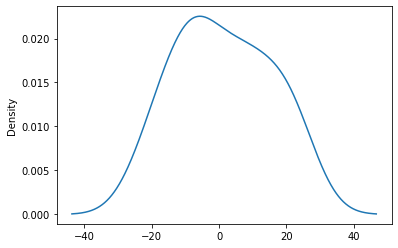

In [ ]:
model_Arima_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred

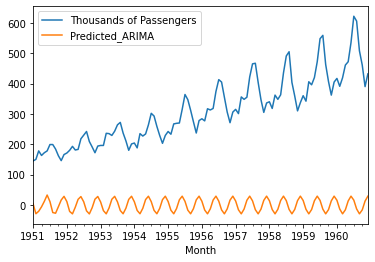

In [ ]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

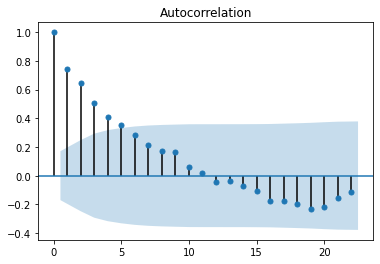

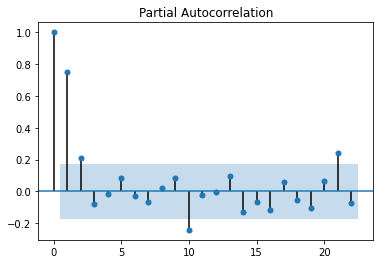

In [ ]:
acf12 = plot_acf(df_airline["Passenger_12_diff"].dropna())
pacf12 = plot_pacf(df_airline["Passenger_12_diff"].dropna())

In [ ]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(0,2,6),seasonal_order=(0,1,0,12))

In [ ]:
model_SARIMA_fit=model_SARIMA.fit()

ValueError: ignored

In [ ]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:            Thousands of Passengers   No. Observations:                   24
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 12)   Log Likelihood                 -34.500
Date:                            Thu, 04 Aug 2022   AIC                             71.000
Time:                                    18:34:51   BIC                             71.303
Sample:                                01-01-1949   HQIC                            70.668
                                     - 12-01-1950                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        58.0997     27.225      2.134      0.033       4.740     111.459
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.17
Prob(Q):                               nan   Prob(JB):                         0.56
Heteroskedasticity (H):              10.18   Skew:                             0.80
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_data.tail()

,Thousands of Passengers,Passenger_first_diff,Passenger_second_diff,Passenger_12_diff,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,-13.354260
1960-09-01,508.0,-98.0,-82.0,45.0,-29.431163
1960-10-01,461.0,-47.0,51.0,54.0,-16.532755
1960-11-01,390.0,-71.0,-24.0,28.0,12.501703
1960-12-01,432.0,42.0,113.0,27.0,28.770892


In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1951-01-01 00:00:00
1960-12-01 00:00:00


In [ ]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

KeyError: ignored

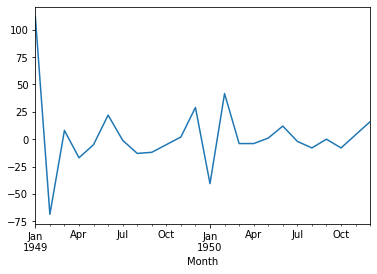

In [ ]:

model_SARIMA_fit.resid.plot()

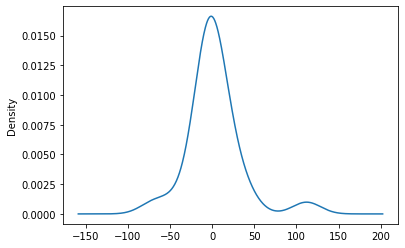

In [ ]:
model_SARIMA_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_SARIMA']=pred_Sarima


NameError: ignored

In [ ]:

test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

KeyError: ignored